In [108]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
import seaborn as sns; sns.set()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold , StratifiedKFold
from classification_utilities import display_cm, display_adj_cm
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import preprocessing
from sklearn.model_selection import LeavePGroupsOut
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.signal import medfilt
from sklearn.ensemble import  RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer
import xgboost as xgb
from xgboost.sklearn import  XGBClassifier
from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm, display_adj_cm
import lasio as las

In [109]:
#le txt e tira \n
with open('data/1FL1PI_AGP.txt') as f:
    AGP_d = [line.rstrip() for line in f]

#pega linhas da litologia
#ln_tl = [689, 957]
#AGP_d = AGP_d[ln_tl[0]:ln_tl[1]]
#pega nome das colunas
#total de colunas de dados
line_blocks = 7
#largura das colunas de dados
line_index_g = [0, 17, 35, 52, 70, 85, 100, 118]
#nome das colunas
agp_col = []
for i in range(line_blocks) :
    lc_i = line_index_g[i]
    lc_p = line_index_g[i+1]
    value = ' '.join(AGP_d[0][lc_i:lc_p].split())
    #print(i,value)
    agp_col.append(value)
#exclui coluna topo e repassa por base e add colune ID rocha
agp_col[0] = agp_col[1]
agp_col[1] = 'ID_ROCHA'

#add dados nas colunas
line_index_c = [19, 25, 37, 39, 40, 60, 61, 73, 74, 87, 88, 100, 101, 118]
#cria dataframe com o nome das colunas
agp_df = pd.DataFrame(columns=agp_col)
#add dados das colunas
line_total = len(AGP_d)
for j in range(1,line_total,1) :
    for i in range(0,(line_blocks*2),2) :
        lc_i = line_index_c[i]
        lc_p = line_index_c[i+1]
        value = ' '.join(AGP_d[j][lc_i:lc_p].split())
        agp_df.append({agp_col[int(i/2)]:value}, ignore_index=True)
        agp_df.at[(j-1), agp_col[int(i/2)]] = value
        
agp_df

,BASE,ID_ROCHA,ROCHA,COR,TONALIDADE,GRANULOMETRIA,ARREDONDAMENTO
0,17.0,49,ARENITO,BRANCO,AVERMELHADO,MUITO FINO,SUBARREDONDADO
1,30.0,57,FOLHELHO,VERMELHO,ESCURO,,
2,77.0,49,ARENITO,BRANCO,AVERMELHADO,FINO,SUBANGULAR
3,79.0,54,SILTITO,VERMELHO,ESCURO,,
4,84.0,49,ARENITO,BRANCO,AVERMELHADO,MEDIO,SUBARREDONDADO
5,88.0,54,SILTITO,VERMELHO,ESCURO,,
6,90.0,49,ARENITO,BRANCO,AVERMELHADO,,SUBARREDONDADO
7,92.0,54,SILTITO,VERMELHO,ESCURO,,
8,112.0,49,ARENITO,BRANCO,ACINZENTADO,MEDIO,SUBARREDONDADO
9,118.0,57,FOLHELHO,VERMELHO,ESCURO,,


In [110]:
wb_las = las.read('data/1RB1MA.las')
#wa_las = las.read('data/1FL1PI.las')
#wc_las = las.read('2-CP-0001-MA_c.las')

#pega as keys e os dados
an_las_keys = wb_las.keys()
an_las_data = wb_las.data

#print(an_las_keys)
#print(an_las_data)

if 'DEPT' in an_las_keys[1] :
    del an_las_keys[0]
    an_las_keys[0] = 'DEPT'
    an_las_data = np.delete(an_las_data, [0], 1)
else :
    pass
    
#print(an_las_keys)
#print(an_las_data)

#cria data frame

w_las_df = pd.DataFrame(data=an_las_data, columns=an_las_keys)
w_las_df

,DEPT,DLT,GR,NEUT,RILD,SP
0,35.00000,NaN,3.1510,277.00681,NaN,NaN
1,35.10000,NaN,3.1870,277.91690,NaN,NaN
2,35.20000,NaN,3.2230,278.82690,NaN,NaN
3,35.30000,NaN,3.2435,279.91489,NaN,NaN
4,35.40000,NaN,3.2640,281.00290,NaN,NaN
5,35.50000,NaN,3.2540,282.38199,NaN,NaN
6,35.60000,NaN,3.2440,283.76099,NaN,NaN
7,35.70000,NaN,3.2030,285.48141,NaN,NaN
8,35.80000,NaN,3.1620,287.20190,NaN,NaN
9,35.90000,NaN,3.1105,289.11789,NaN,NaN


In [112]:
for i in range(1,7,1) :
    w_las_df[agp_df.columns.values.tolist()[i]] = ''
w_las_df.columns.values

array(['DEPT', 'DLT', 'GR', 'NEUT', 'RILD', 'SP', 'ID_ROCHA', 'ROCHA',
       'COR', 'TONALIDADE', 'GRANULOMETRIA', 'ARREDONDAMENTO'],
      dtype=object)

In [163]:
#full_df = pd.DataFrame(data=full_data_d, columns=full_data_h)

for i, depth_las in enumerate(w_las_df[w_las_df.columns.values[0]].values) :
    for j, depth_agp in enumerate(agp_df[agp_df.columns.values[0]].values) :
        
        if (float(depth_las) < float(depth_agp)) :          
            #print(i, j, depth_las, depth_agp, agp_df[agp_df.columns.values[2]][j-1])
            
            for k in range(1,7,1) :
                w_las_df.at[i, agp_df.columns.values.tolist()[k]] = agp_df[agp_df.columns.values[k]][j-1]
            
            break
        else :
            pass
        

training_data = w_las_df

In [196]:
training_data.ID_ROCHA = pd.to_numeric(training_data.ID_ROCHA, errors='coerce')
training_data.describe()
training_data['COR'] = training_data['COR'].astype('category')
training_data['TONALIDADE'] = training_data['TONALIDADE'].astype('category')
# training_data['Well Name'].unique()
training_data

,DEPT,DLT,GR,NEUT,RILD,SP,ID_ROCHA,ROCHA,COR,TONALIDADE,GRANULOMETRIA,ARREDONDAMENTO
0,35.00000,NaN,3.1510,277.00681,NaN,NaN,57,FOLHELHO,VERMELHO,ESCURO,,
1,35.10000,NaN,3.1870,277.91690,NaN,NaN,57,FOLHELHO,VERMELHO,ESCURO,,
2,35.20000,NaN,3.2230,278.82690,NaN,NaN,57,FOLHELHO,VERMELHO,ESCURO,,
3,35.30000,NaN,3.2435,279.91489,NaN,NaN,57,FOLHELHO,VERMELHO,ESCURO,,
4,35.40000,NaN,3.2640,281.00290,NaN,NaN,57,FOLHELHO,VERMELHO,ESCURO,,
5,35.50000,NaN,3.2540,282.38199,NaN,NaN,57,FOLHELHO,VERMELHO,ESCURO,,
6,35.60000,NaN,3.2440,283.76099,NaN,NaN,57,FOLHELHO,VERMELHO,ESCURO,,
7,35.70000,NaN,3.2030,285.48141,NaN,NaN,57,FOLHELHO,VERMELHO,ESCURO,,
8,35.80000,NaN,3.1620,287.20190,NaN,NaN,57,FOLHELHO,VERMELHO,ESCURO,,
9,35.90000,NaN,3.1105,289.11789,NaN,NaN,57,FOLHELHO,VERMELHO,ESCURO,,


In [183]:
# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#66CD00', '#FFFF00','#8B3626','#8B7B8B','#EE9A00',
                '#6B8E23']
       
facies_labels = ['FOLHELHO', 'ARENITO', 'SILTITO', 'DIABASIO', 'META-ARENITO', 'XISTO']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
    
# def label_facies(row, labels):
#     return labels[row['ID_ROCHA'] -1]
    
# training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [187]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs
    logs = logs.sort_values(by='DEPT')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    
    ztop=logs.DEPT.min(); zbot=logs.DEPT.max()
    
    cluster=np.repeat(np.expand_dims(logs['ID_ROCHA'].values,1), 1000, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.DLT, logs.DEPT, '-g')
    ax[1].plot(logs.GR, logs.DEPT, '-')
    ax[2].plot(logs.NEUT, logs.DEPT, '-', color='0.5')
    
    
#     ax2 = ax[2].twiny()
#     ax2.plot(logs.PHIND, logs.Depth, '-', color='r')
#     ax2.set_ylim(ztop,zbot)
#     ax2.invert_yaxis()
#     ax2.set_xlabel("PHIND")
#     ax2.set_xlim(logs.PHIND.min(),logs.PHIND.max())
#     ax2.invert_xaxis()
# #     ax2.set_xlim(ax2.get_xlim()[::-1])
    
    ax[3].plot(logs.RILD, logs.DEPT, '-', color='r')
    ax[4].plot(logs.SP, logs.DEPT, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join(['FOLHELHO', 'ARENITO', 'SILTITO', 'DIABASIO', 'META-ARENITO',
                                 'XISTO']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("DLT")
    ax[0].set_xlim(logs.DLT.min(),logs.DLT.max())
    ax[1].set_xlabel("GR")
    ax[1].set_xlim(logs.GR.min(),logs.GR.max())
    ax[2].set_xlabel("NEUT")
    ax[2].set_xlim(logs.NEUT.min(),logs.NEUT.max())
    ax[3].set_xlabel("RILD")
    ax[3].set_xlim(logs.RILD.min(),logs.RILD.max())
    ax[4].set_xlabel("SP")
    ax[4].set_xlim(logs.SP.min(),logs.SP.max())
    ax[5].set_xlabel('ROCHAS')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
#    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)
    
    #ax[2].invert_xaxis()

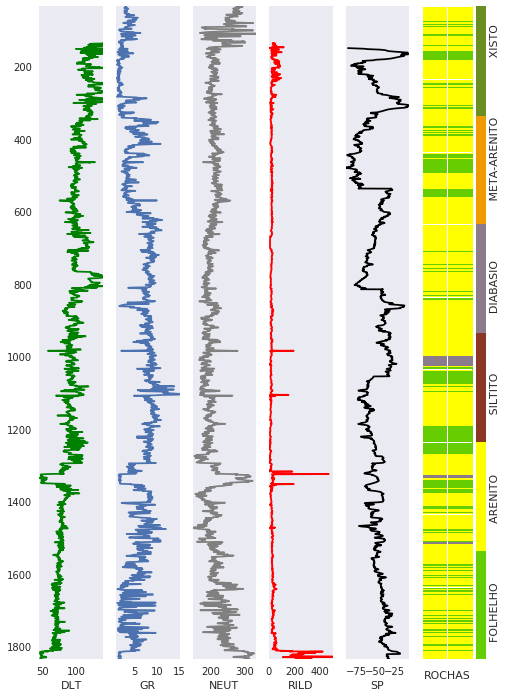

In [188]:
# make_facies_log_plot(
#     training_data[training_data['Well Name'] == 'SHRIMPLIN'],
#     facies_colors)

#training_data['ID_ROCHA'].values

make_facies_log_plot(
    training_data,
    facies_colors)

FOLHELHO         2360
ARENITO         12315
SILTITO           945
DIABASIO          820
META-ARENITO       70
XISTO            1480
Name: COR, dtype: int64

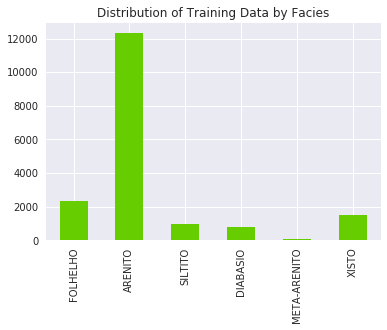

In [194]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['COR'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

In [195]:
#save plot display settings to change back to when done plotting with seaborn
inline_rc = dict(mpl.rcParams)

import seaborn as sns
sns.set()
sns.pairplot(training_data.drop(['Depth','ID_ROCHA','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)

ValueError: labels ['Well Name' 'Facies' 'Formation' 'Depth' 'NM_M' 'RELPOS'] not contained in axis